<a href="https://colab.research.google.com/github/tanuja200/PGCPtest2/blob/main/Mydrive_Demo_DT_Fruits_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint
## Not for grading

## Learning Objective

The objective of this experiment is to understand Decision Tree classifier and visualize it

## Dataset

The dataset chosen for this  experiment is a handmade fruits dataset. The dataset contains 69 records. Each record represents the following details of fruits : 

*  Weight -   It is the mass of an object. With respect to this dataset, we have calculated the weights in grams 

* Sphericity -   is a measure of how closely the shape of an object approaches that of a mathematically perfect sphere.

* Color -  Every fruit has a different color at different stages. You can encode the color to an integer value. For example

     - Green as 20
     - Greenish Yellow as 40
     - Orange as 60
     - Red as 80
     - Reddish Yellow as 100

*  Label -   We have considered two fruits for simplicity. They are Apple and Orange.




### Setup Steps

In [ ]:
#@title Please enter your registration id to start:  { run: "auto", display-mode: "form" }
Id = "P22A18E_test" #@param {type:"string"}

In [ ]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "98765432111" #@param {type:"string"}

In [ ]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
  
notebook= "Demo_DT_Fruits_data" #name of the notebook
Answer = "Ungraded"
def setup():
    ipython.magic("sx wget https://cdn.talentsprint.com/aiml/Experiment_related_data/fruits_weight_sphercity.csv")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "feedback_experiments_input" : Comments, "notebook" : notebook}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions")
        # print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
      return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError 
    else: 
      return Answer
  except NameError:
    print ("Please answer Question")
    return None

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
    
else:
  print ("Please complete Id and Password cells before running setup")


Setup completed successfully


### Importing Required Packages

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz # export_graphviz function creates a GraphViz representation of the decision tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import graphviz    # graphviz is a graphical vizualisation of graph objects
import os
import warnings
warnings.filterwarnings("ignore")

### Loading the data

In [ ]:
fruits_data = pd.read_csv("fruits_weight_sphercity.csv")
fruits_data.head()

,Color,Weight,Sphericity,labels
0,Red,200,0.40,apple
1,Orange,320,1.00,orange
2,Orange,310,0.95,orange
3,Red,220,0.45,apple
4,Red,230,0.50,apple


Let us consider below values for replacing the colors with integer values.

* Green as 20
* Greenish Yellow as 40
* Orange as 60
* Red as 80
* Reddish Yellow as 100




In [ ]:
# Replace colors and labels with integer values
fruits_data['Color'] = fruits_data['Color'].replace(['Green', 'Greenish yellow','Orange', 'Red','Reddish yellow'],[20, 40, 60, 80, 100])
fruits_data['labels']= fruits_data['labels'].replace(['apple','orange'],[0, 1])

To get better understanding of the data, print first five rows of the data using head () and last five rows of the data using tail()

In [ ]:
fruits_data.head()

,Color,Weight,Sphericity,labels
0,80,200,0.40,0
1,60,320,1.00,1
2,60,310,0.95,1
3,80,220,0.45,0
4,80,230,0.50,0


In [ ]:
fruits_data.tail()

,Color,Weight,Sphericity,labels
64,80,200,0.43,0
65,80,200,0.49,0
66,80,200,0.42,0
67,80,201,0.40,0
68,80,202,0.40,0


In [ ]:
# Get Features and Labels from the dataset
data = fruits_data[["Sphericity", "Weight"]].values
labels = fruits_data["labels"].values

In [ ]:
# Let us see the size of features and labels
data.shape, labels.shape

((69, 2), (69,))

### Splitting the data into train and test sets 

In [ ]:
# Training and testing set ratio is 67 : 33
# random_state generates the same sequence of random numbers everytime of the code execution
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.33, random_state=42) 

In [ ]:
# Verify the shape of train and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((46, 2), (23, 2), (46,), (23,))

### Training a Decision Tree Classifier 

In [ ]:
# Creating an object of DecisionTreeClassifier.
decision_tree = DecisionTreeClassifier()

# Training or fitting the model with the train data
clf = decision_tree.fit(X_train, y_train)

# Predicting the test data using trained model
pred = clf.predict(X_test)

# Calculating the score
accuracy_score(y_test, pred) 

0.8260869565217391

### Visualize the data to get more sense of data


Matplotlib has a number of built-in colormaps using cmap, For more details refer to the following [link](https://matplotlib.org/tutorials/colors/colormaps.html)

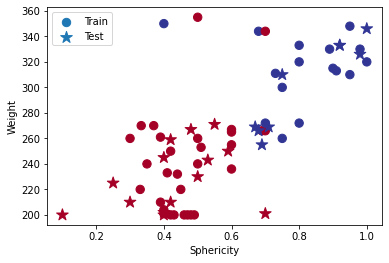

In [ ]:
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='RdYlBu', s=70, label="Train") # S is marker size
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap='RdYlBu', marker="*", s=150, label="Test")
plt.xlabel("Sphericity")
plt.ylabel("Weight")
plt.legend(loc='upper left')
plt.show()

### Visualize the Decision Tree boundaries at each depth

* graphviz is a graphical vizualisation of graph objects.
* export_graphviz function creates a GraphViz representation of the decision tree, which can be exported as a DOT file.
* The OS module has functions for dealing with the operating system. Python's standard utility modules include OS. This module allows you to use operating system-dependent functions.


Training Accuracy: 0.93   Testing Accuracy: 0.83   at Depth: 1


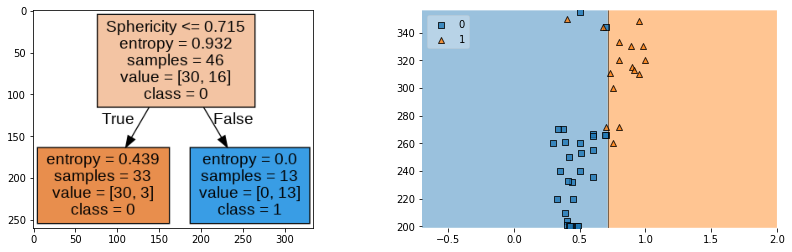

Training Accuracy: 0.96   Testing Accuracy: 0.83   at Depth: 2


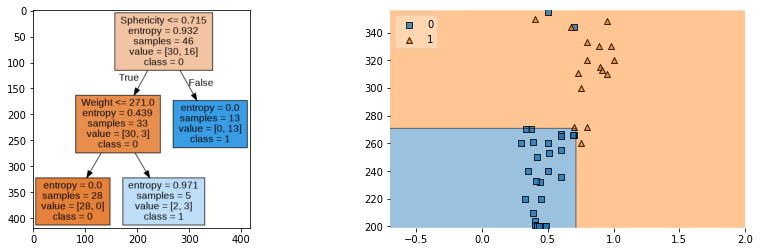

Training Accuracy: 0.98   Testing Accuracy: 0.83   at Depth: 3


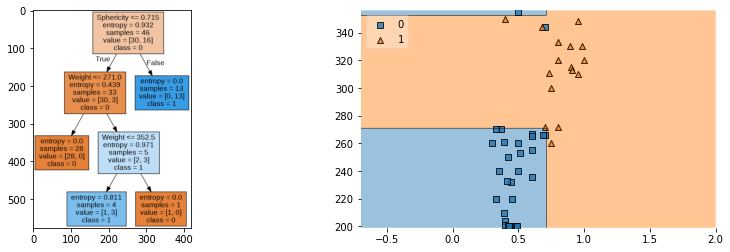

In [ ]:
for depth in range(1, 4):

    # max_depth parameter regularize the tree, or limit the way it grows to prevent over-fitting
    # random_state generates the same sequence of random numbers everytime of the code execution
    dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = depth) 

    # Fitting the data
    dt = dt.fit(X_train, y_train) 
    training_acc = accuracy_score(dt.predict(X_train),y_train)
    testing_acc = accuracy_score(dt.predict(X_test),y_test)
    print("Training Accuracy:", round(training_acc,2)," ","Testing Accuracy:", round(testing_acc,2), " ", "at Depth:",depth)


    # plt.subplots() function returns a tuple containing a figure and axes objects
    fig,ax =  plt.subplots(1,2,figsize=(14,4))

    # Exporting the model into a dot file
    saveAs = "Fruits_" + str(depth)
    save_dot = saveAs + ".dot"
    save_png = saveAs + ".png"

    # Plot the GraphViz representation of the decision tree
    graph = graphviz.Source(export_graphviz(dt, out_file=save_dot,feature_names= ["Sphericity","Weight"], class_names=['0', '1'],filled = True))
    os.system("dot -T png -o " + save_png + " " + save_dot)   
    ax[0].imshow(plt.imread(save_png))

    # Plot the decision boundary 
    plot_decision_regions(X_train, y_train, clf=dt, legend=2)
    plt.show()

## Please answer the questions below to complete the experiment:

In [ ]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [ ]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "" #@param {type:"string"}


In [ ]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "" #@param ["","Yes", "No"]


In [ ]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Run this cell to submit your notebook  { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id =return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Please answer Complexity Question
